In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Load the Data

In [4]:
def load_data():
    root_dir = os.path.join(os.getcwd(), '../videos')
    file_name = os.path.join(root_dir, 'all_data.csv')
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            data.append(line.split(','))

    def get_row_labels(col_num):
        # put min max labels in stats
        row_labels = []
        i = 0
        while i <len(data) and data[i][col_num] not in row_labels:
            if data[i][col_num] != '': row_labels.append(data[i][col_num])
            i += 1
        return row_labels

    dists = get_row_labels(0)
    stats = get_row_labels(1)
    data = [line[2:-1] for line in data]
    cams = [entry for entry in data[0] if entry != '']
    objs = [entry for entry in data[1] if entry != '']
    labels = [entry for entry in data[2] if entry != '']
    num_objs = len(set(objs))
    objs = objs[:num_objs]
    num_labels = len(set(labels))
    labels = labels[:num_labels]
    data = data[3:]

    data_categories = [stats, dists,labels,objs,cams]
    data = np.asarray(data).astype(np.float)
    # create a data tensor with dimension
    # min_max x distance x label x obj x cam_num
    data = np.stack(np.split(data, len(cams), axis=1), axis=0)
    data = np.stack(np.split(data, len(objs), axis=2), axis=0)
    data = np.stack(np.split(data, len(labels), axis=3), axis=0)
    data = np.stack(np.split(data, len(dists), axis=3), axis=0)
    data = np.stack(np.split(data, len(stats), axis=4), axis=0)
    print('stats: ' + str(stats))
    print('distance: ' + str(dists))
    print('labels: ' + str(labels))
    print('objs: ' + str(objs))
    print('cams: ' + str(cams))
    print('Shape corresponds to:  (stats , distance , label , obj , cam_num, 1, 1)')
    print(data.shape)
    return data, data_categories

data,data_categories = load_data()

stats: ['mean', 'max']
distance: ['3', '5', '10', '15']
labels: ["'cup'", " 'bottle'", " 'person'"]
objs: ['Coke_Can', 'Gatorade_bottle', 'water_bottle', 'Sprite_Can', 'MountainDew_bottle']
cams: ['cam_0', 'cam_1', 'cam_2']
Shape corresponds to:  (stats , distance , label , obj , cam_num, 1, 1)
(2, 4, 3, 5, 3, 1, 1)


average mean object probability
[('Coke_Can', 0.34371758618012627), ('Gatorade_bottle', 0.4028096111146388), ('water_bottle', 0.37684994882179634), ('Sprite_Can', 0.352941971341217), ('MountainDew_bottle', 0.41061199768273915)]


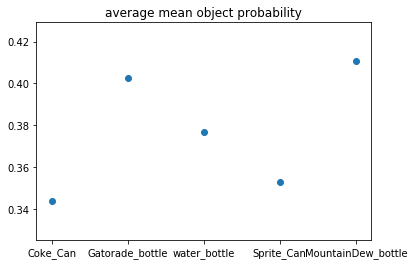

average max object probability
[('Coke_Can', 0.5732727448145548), ('Gatorade_bottle', 0.5844377825657526), ('water_bottle', 0.6148187153869205), ('Sprite_Can', 0.6103454894489713), ('MountainDew_bottle', 0.6131155441204706)]


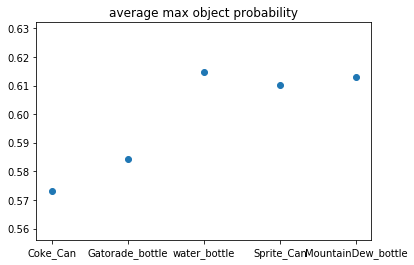

In [11]:
title ="average mean object probability"
print(title)
category_num = 3 #obj
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'label'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()

title ="average max object probability"
print(title)
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'label'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()

average mean probability vs distance
[('3', 0.4126239035858049), ('5', 0.4119122980810978), ('10', 0.34679971013908034), ('15', 0.3382089803064311)]


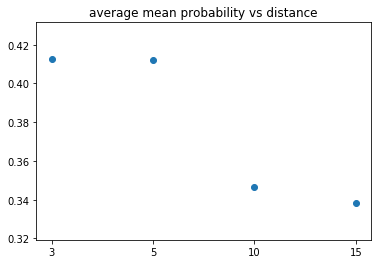

average max probability vs distance
[('3', 0.7508398400412666), ('5', 0.6783342414432102), ('10', 0.5509084277682834), ('15', 0.4167097118165758)]


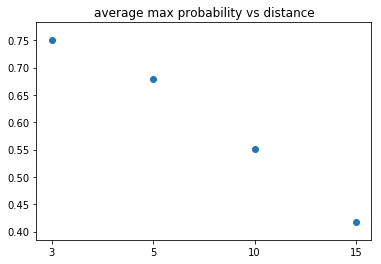

In [12]:
title = "average mean probability vs distance"
print(title)
category_num = 1 #distance
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'distance'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()

title="average max probability vs distance"
print(title)
category_num = 1 #distance
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'distance'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()

average mean camera vs probability
[('cam_0', 0.3731091208424833), ('cam_1', 0.40672301073041245), ('cam_2', 0.352326537511415)]


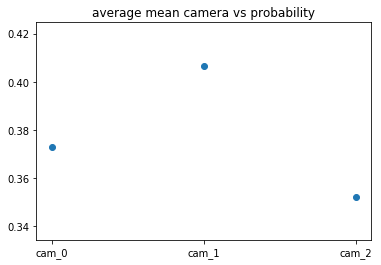

average max camera vs probability
[('cam_0', 0.5979068795839946), ('cam_1', 0.6794879108667373), ('cam_2', 0.52019937535127)]


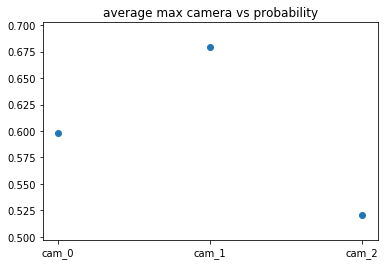

In [13]:
title = "average mean camera vs probability"
print(title)
category_num = 4 # camera num
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'camera'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()

title="average max camera vs probability"
print(title)
category_num = 4 #camera num
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel = 'camera'
plt.ylabel = 'probability'
plt.scatter(data_categories[category_num], avg_prob)
plt.show()